# Scikit-Learn Mini Project 2
***
We are going to make predictions models for guessing will it be rain in Australia or not based on dataset that contains daily weather observations from numerous Australian weather stations.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

Our dataset is large and not clean, so we have to pre-process it correctly.

"RainTomorrow" is our target variable, based on it we will train our models.

In [2]:
w=pd.read_csv("Data/a-weather.csv")
w.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [3]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [4]:
w.count().sort_values()

Sunshine          74377
Evaporation       81350
Cloud3pm          85099
Cloud9am          88536
Pressure9am      128179
Pressure3pm      128212
WindDir9am       132180
WindGustDir      132863
WindGustSpeed    132923
WindDir3pm       138415
Humidity3pm      138583
Temp3pm          139467
WindSpeed3pm     139563
Humidity9am      140419
RainToday        140787
Rainfall         140787
WindSpeed9am     140845
Temp9am          141289
MinTemp          141556
MaxTemp          141871
Date             142193
Location         142193
RISK_MM          142193
RainTomorrow     142193
dtype: int64

First of all we are going to remove 'Sunshine','Evaporation','Cloud3pm' and 'Cloud9am' columns because they contains only 60% of data.

We will also remove 'Date', 'Location' and 'RISK_MM'.

Location beacuse we want to predict if it would rain generaly in Australia. 

Risk_MM because it can reduce predictability.

In [5]:
w=w.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','RISK_MM','Date'],axis=1)

In [6]:
w.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


Now we raplace values of 'RainToday' and 'RainTomorrow' from strings to integers.

In [7]:
w['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
w['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [8]:
w.head(20)

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0
5,14.6,29.7,0.2,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,0.0,0
6,14.3,25.0,0.0,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,0.0,0
7,7.7,26.7,0.0,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,0.0,0
8,9.7,31.9,0.0,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,0.0,1
9,13.1,30.1,1.4,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,20.1,28.2,1.0,0


Then we also replace values of 'WindGustDir', 'WindDir9am', 'WindDir3pm' from strings to integers.

In [9]:
number={'E':0, 'ENE':1, 'ESE':2, 'N':3, 'NE':4, 'NNE':5, 'NNW':6, 'NW':7, 'S':8, 'SE':9, 'SSE':10, 'SSW':11, 'SW':12, 'W':13, 'WNW':14, 'WSW':15}

In [10]:
w=w.replace({'WindGustDir':number, 'WindDir9am':number, 'WindDir3pm':number})

In [11]:
w.mean()

MinTemp            12.186400
MaxTemp            23.226784
Rainfall            2.349974
WindGustDir         7.712072
WindGustSpeed      39.984292
WindDir9am          7.303351
WindDir3pm          7.755417
WindSpeed9am       14.001988
WindSpeed3pm       18.637576
Humidity9am        68.843810
Humidity3pm        51.482606
Pressure9am      1017.653758
Pressure3pm      1015.258204
Temp9am            16.987509
Temp3pm            21.687235
RainToday           0.223423
RainTomorrow        0.224181
dtype: float64

Now we are going to go replace all Nan values with average of each columns.

In [16]:
w=w.fillna(w.mean())
w.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0
1,7.4,25.1,0.0,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0
2,12.9,25.7,0.0,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0
3,9.2,28.0,0.0,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0
4,17.5,32.3,1.0,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0


In [13]:
w.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

So we can see 0=it will not rain and 1=it will rain

In [17]:
w["RainTomorrow"].value_counts()

0    110316
1     31877
Name: RainTomorrow, dtype: int64

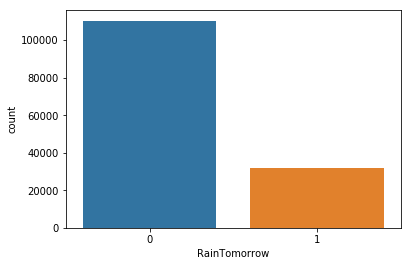

In [19]:
sns.countplot(w["RainTomorrow"])

We separate the dataset as reposne variable and feature variables.

In [21]:
X=w.drop("RainTomorrow",axis=1)
y=w["RainTomorrow"]

We make train and test splitting of data.

In [22]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=50)

We can apply standard scaling to get optimized results -> to remove to small or to high results (outlayers)

In [23]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [24]:
X_train[:10]

array([[-8.58220300e-01, -5.93374318e-01, -2.77186922e-01,
         9.48714788e-01, -5.33530389e-01,  1.06949429e+00,
         4.92453538e-01,  6.75958728e-01, -1.89653863e-01,
        -4.41196251e-02,  5.11456002e-01,  4.82060997e-01,
         7.84330774e-01, -4.60999327e-01, -8.10913285e-01,
        -5.38475084e-01],
       [ 1.64593976e+00,  1.10736283e+00,  7.17263780e-01,
         5.04821990e-01,  1.59655860e+00,  6.13124280e-01,
        -1.26918096e+00,  9.01733481e-01,  3.82946281e-01,
        -3.61394290e-01,  2.45278014e-02,  1.56902550e-01,
         9.72508720e-02,  1.64059966e+00,  1.32566182e+00,
         1.87581686e+00],
       [-6.07804294e-01, -1.32426962e+00, -2.29832126e-01,
         2.82875591e-01,  7.59737928e-01, -2.99615737e-01,
        -3.88363711e-01, -7.91577161e-01,  3.93861945e-02,
         9.60583482e-01,  2.02093342e+00,  2.26878194e-03,
         1.38881753e-03, -6.46434531e-01, -1.36322522e+00,
        -5.38475084e-01],
       [-1.15558931e+00,  6.01358386e

Now we can make our prediction models.

We will try with Random Forest Classifier, Support Vector Machine and Neural Network model.

### Random Forest Classifier

In [25]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [26]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     27752
           1       0.76      0.52      0.62      7797

   micro avg       0.86      0.86      0.86     35549
   macro avg       0.82      0.74      0.76     35549
weighted avg       0.85      0.86      0.85     35549



In [27]:
print(confusion_matrix(y_test, pred_rfc))

[[26450  1302]
 [ 3755  4042]]


### Support Vector Machine

In [28]:
clf=svm.SVC()
clf.fit(X_train, y_train)
pred_clf=clf.predict(X_test)

In [29]:
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     27752
           1       0.78      0.47      0.58      7797

   micro avg       0.85      0.85      0.85     35549
   macro avg       0.82      0.71      0.75     35549
weighted avg       0.85      0.85      0.84     35549



In [33]:
print(confusion_matrix(y_test, pred_clf))

[[26721  1031]
 [ 4165  3632]]


### Neural Network

In [30]:
mlpc=MLPClassifier(hidden_layer_sizes=(11, 11, 11), max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc=mlpc.predict(X_test)

In [31]:
print(classification_report(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     27752
           1       0.72      0.54      0.62      7797

   micro avg       0.85      0.85      0.85     35549
   macro avg       0.80      0.74      0.76     35549
weighted avg       0.84      0.85      0.84     35549



In [34]:
print(confusion_matrix(y_test, pred_mlpc))

[[26102  1650]
 [ 3588  4209]]


## CONCLUSION

In [32]:
from sklearn.metrics import accuracy_score
cm_RFC=accuracy_score(y_test, pred_rfc)
cm_SVM=accuracy_score(y_test, pred_clf)
cm_NN=accuracy_score(y_test, pred_mlpc)

print("Random Forest Classifier have "'{:.2%}'.format(cm_RFC),"accuracy!")
print("Support Vector Machine "'{:.2%}'.format(cm_SVM),"accuracy!")
print("Neural Network have "'{:.2%}'.format(cm_NN),"accuracy!")

Random Forest Classifier have 85.77% accuracy!
Support Vector Machine 85.38% accuracy!
Neural Network have 85.27% accuracy!


We can see that every model has almost the same accuracy but Random Forest Classifier model will have (in most cases) best accuracy in prediction.